## BBM 409 - Programming Assignment 4

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (Sezin, Yavuz, 2200356050)

## Understanding LSTM's with Sentiment Analysis (100 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.
* Description of the dataset used for analysis.

In [1]:
# Import necessary libraries
# Import necessary libraries
import os
from google.colab import drive
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download
from textblob import TextBlob
import re
import string
from bs4 import BeautifulSoup
import re


In [2]:
# Load the data into pandas a dataframe
# Represent the sentiments in a meaningful numerical form
# Check the first few rows
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

# Unmount and remount the drive
drive.flush_and_unmount()
print("Drive unmounted.")
drive.mount('/content/drive', force_remount=True)
print("Drive remounted.")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/subset10000_IMDB_Dataset.csv adlı dosyanın kopyası')

print(df.head())
print("\n")
'''
# Download necessary NLTK data
download("punkt")
download("stopwords")

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    return text

df["Cleaned_Review"] = df["review"].apply(clean_text)

# Tokenize the Text
df["Tokens"] = df["Cleaned_Review"].apply(word_tokenize)

# Remove Stopwords (optional)
stop_words = set(stopwords.words("english"))
df["Tokens"] = df["Tokens"].apply(lambda x: [word for word in x if word not in stop_words])
'''
#  Represent Sentiments Numerically
sentiment_map = {"positive": 1, "negative": -1}
df["Sentiment_Numerical"] = df["sentiment"].map(sentiment_map)

print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Drive not mounted, so nothing to flush and unmount.
Drive unmounted.
Mounted at /content/drive
Drive remounted.
                                              review sentiment
0  Starts really well, nice intro and build up fo...  negative
1  Terrific movie: If you did not watch yet, you ...  positive
2  I've seen hundreds of silent movies. Some will...  positive
3  i had been looking for this film for so long b...  positive
4  Good: Engaging cinematic firefights, great pre...  positive


                                              review sentiment  \
0  Starts really well, nice intro and build up fo...  negative   
1  Terrific movie: If you did not watch yet, you ...  positive   
2  I've seen hundreds of silent movies. Some will...  positive   
3  i had been looking for this film for so long b...  positive   
4  Good: Engaging cinematic firefights, great pre...  positive   

   Sentiment_Numerical  
0                   -1  
1                    1  
2                    1  
3          

In [3]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

print(df.head())
print("\n")

print(df.shape)
print("\n")

print(df.dtypes)
print("\n")

print(df.describe())
print("\n")

print(df.info())
print("\n")

print(df["sentiment"].value_counts())
print("\n")

print(df.isnull().sum())
print("\n")

print(df.tail())


                                              review sentiment  \
0  Starts really well, nice intro and build up fo...  negative   
1  Terrific movie: If you did not watch yet, you ...  positive   
2  I've seen hundreds of silent movies. Some will...  positive   
3  i had been looking for this film for so long b...  positive   
4  Good: Engaging cinematic firefights, great pre...  positive   

   Sentiment_Numerical  
0                   -1  
1                    1  
2                    1  
3                    1  
4                    1  


(10000, 3)


review                 object
sentiment              object
Sentiment_Numerical     int64
dtype: object


       Sentiment_Numerical
count          10000.00000
mean               0.00000
std                1.00005
min               -1.00000
25%               -1.00000
50%                0.00000
75%                1.00000
max                1.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns

### 2. Preprocessing the Data (10 points)

In [4]:
# An example function for prepocess the texts and create the tokens, you can improve it to clean the texts more accurately
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk import download


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def prepocess_text(text):
    # Replace slashes or other separators with spaces
    # Remove HTML tags
    # Convert to lowercase
    # Remove special characters except spaces
    # Tokenize
    # Remove stop words and lemmatize
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r'[\/|-]', ' ', text)
    # Remove special characters except spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)

    # Remove stop words and lemmatize
    stop_words = set(stopwords.words("english"))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]


    return tokens



In [10]:
# Add a tokens column to the dataframe to store preprocessed tokens
# Build the vocabulary using the tokens
# Assign indices to each token in the vocabulary
# Reserve 0 for padding
download("punkt")
download("stopwords")
download("wordnet")
download("omw-1.4")

df["Processed_Tokens"] = df["review"].apply(prepocess_text)

# Display the processed data
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              review sentiment  \
0  Starts really well, nice intro and build up fo...  negative   
1  Terrific movie: If you did not watch yet, you ...  positive   
2  I've seen hundreds of silent movies. Some will...  positive   
3  i had been looking for this film for so long b...  positive   
4  Good: Engaging cinematic firefights, great pre...  positive   

   Sentiment_Numerical                                   Processed_Tokens  \
0                   -1  [start, really, well, nice, intro, build, main...   
1                    1  [terrific, movie, watch, yet, must, watch, gee...   
2                    1  [ive, seen, hundred, silent, movie, always, cl...   
3                    1  [looking, film, long, found, seen, younger, lo...   
4                    1  [good, engaging, cinematic, firefights, great,...   

   Review_Length                                            Indices  \
0             84  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 8, 13,...  

Review Lengths:
0        84
1        28
2        62
3        81
4        98
       ... 
9995    233
9996     79
9997    170
9998    393
9999     70
Name: Review_Length, Length: 10000, dtype: int64


0       [start, really, well, nice, intro, build, main...
1       [terrific, movie, watch, yet, must, watch, gee...
2       [ive, seen, hundred, silent, movie, always, cl...
3       [looking, film, long, found, seen, younger, lo...
4       [good, engaging, cinematic, firefights, great,...
                              ...                        
9995    [almost, made, fool, going, start, review, say...
9996    [feel, duty, lover, horror, film, warm, people...
9997    [film, made, creator, thinking, first, mm, fil...
9998    [true, sadomasochism, twosided, coin, contains...
9999    [watch, first, came, vhs, friend, thought, pre...
Name: Processed_Tokens, Length: 10000, dtype: object


count    10000.000000
mean       121.160800
std         91.535505
min          4.000000
25%         65.00000

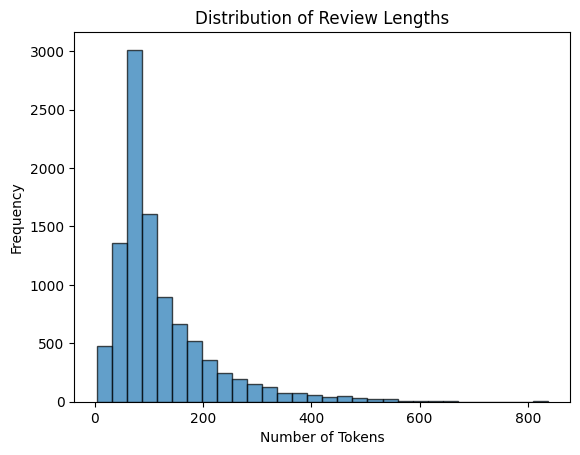

Chosen Padding Length: 237


In [11]:
# Calculate the length of each review from the tokenized version
# Display statistical details about review lengths
# Decide padding length considering these stats
# Remember we don't want padded zeros to overcome meaningful information in the sequence
import matplotlib.pyplot as plt
import numpy as np

#Calculate the Length of Each Review
df["Review_Length"] = df["Processed_Tokens"].apply(len)
print("Review Lengths:")
print(df["Review_Length"])
print("\n")
print(df["Processed_Tokens"])
print("\n")



print(df["Review_Length"].describe())



plt.hist(df["Review_Length"], bins=30, alpha=0.7, edgecolor="black")
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

# padding length as the 90th percentile to cover most reviews
padding_length = int(np.percentile(df["Review_Length"], 90))
print(f"Chosen Padding Length: {padding_length}")

In [35]:
# Convert review tokens to indices and add an indices column to the dataframe to store
# Represent each token in the dataset with its corresponding index from the vocabulary
# Ensure all sequences have the same length by padding shorter sequences with zeros
# Pad the token indices version of review sequences

from collections import defaultdict
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the pad_sequence function
def pad_sequence(seq, max_len):

    padded_indices = pad_sequences(
        [seq], maxlen=max_len, padding="pre", truncating="pre"
    )[0]

    return padded_indices

def build_vocab_and_convert_tokens(df, token_column):
    vocab = {}
    for tokens in df[token_column]:
        for token in tokens:
            if token not in vocab:
                vocab[token] = len(vocab) + 1
    df["Indices"] = df[token_column].apply(lambda tokens: [vocab.get(token, 0) for token in tokens])
    return df, vocab



# Build vocabulary and convert tokens to indices
df, vocab = build_vocab_and_convert_tokens(df, token_column="Processed_Tokens")

df["Padded_Indices"] = df["Indices"].apply(
    lambda seq: pad_sequences([seq], maxlen=padding_length, padding="post", truncating="post")[0]
)
vocab_size = len(vocab) + 1
# Clamp indices to the maximum vocabulary size
df["Padded_Indices"] = df["Padded_Indices"].apply(lambda seq: [min(idx, vocab_size - 1) for idx in seq])

# Validate indices after padding
max_index = max([max(seq) for seq in df["Padded_Indices"] if len(seq) > 0])
print(f"Maximum index in Padded_Indices: {max_index}")

if max_index >= vocab_size:
    raise ValueError(f"Found out-of-range indices! Maximum allowed index: {vocab_size - 1}, but got {max_index}.")

# Clamp indices to prevent out-of-range errors
df["Padded_Indices"] = df["Padded_Indices"].apply(lambda seq: [min(idx, vocab_size - 1) for idx in seq])


# Display the updated DataFrame
print(df.head())


"""
def pad_sequence(seq, max_len):


    return padded_indices


"""
# Add an padded_indices column to store padded sequences

Maximum index in Padded_Indices: 66632
                                              review sentiment  \
0  Starts really well, nice intro and build up fo...  negative   
1  Terrific movie: If you did not watch yet, you ...  positive   
2  I've seen hundreds of silent movies. Some will...  positive   
3  i had been looking for this film for so long b...  positive   
4  Good: Engaging cinematic firefights, great pre...  positive   

   Sentiment_Numerical                                   Processed_Tokens  \
0                   -1  [start, really, well, nice, intro, build, main...   
1                    1  [terrific, movie, watch, yet, must, watch, gee...   
2                    1  [ive, seen, hundred, silent, movie, always, cl...   
3                    1  [looking, film, long, found, seen, younger, lo...   
4                    1  [good, engaging, cinematic, firefights, great,...   

   Review_Length                                            Indices  \
0             84  [1, 2, 3, 4,

'\ndef pad_sequence(seq, max_len):\n\n\n    return padded_indices\n\n\n'

### 3. Visualzing Word Vectors (15 points)

In [14]:
# Load the FastText word vectors
import gensim.downloader as api
fasttext_vectors = api.load("fasttext-wiki-news-subwords-300")
print("FastText model loaded.")

[==================================================] 100.0% 958.5/958.4MB downloaded
FastText model loaded.


In [15]:
# Check out for Out-of-Vocaublary (OOV) words
# See how many words in your created vocaublary are not presented in fasttext-vectors
# Make comments on how OOV words can effect your model performance

def check_oov_words(vocab, fasttext_vectors):

    oov_words = [word for word in vocab if word not in fasttext_vectors]
    oov_rate = len(oov_words) / len(vocab) * 100
    return oov_words, oov_rate

oov_words, oov_rate = check_oov_words(vocab, fasttext_vectors)


print(f"Number of OOV Words: {len(oov_words)}")
print(f"OOV Rate: {oov_rate:.2f}%")
print("Sample OOV Words:", oov_words[:10])
print(f"\n")

vocab_size = len(vocab)
print(f"Vocabulary Size: {vocab_size}")


Number of OOV Words: 31319
OOV Rate: 47.00%
Sample OOV Words: ['lostbr', 'successbr', 'heders', 'lengthbr', 'linebr', 'dolisten', 'geena', 'moviebr', 'bestbut', 'goshdarn']


Vocabulary Size: 66632


# Make comments on how OOV words can effect your model performance


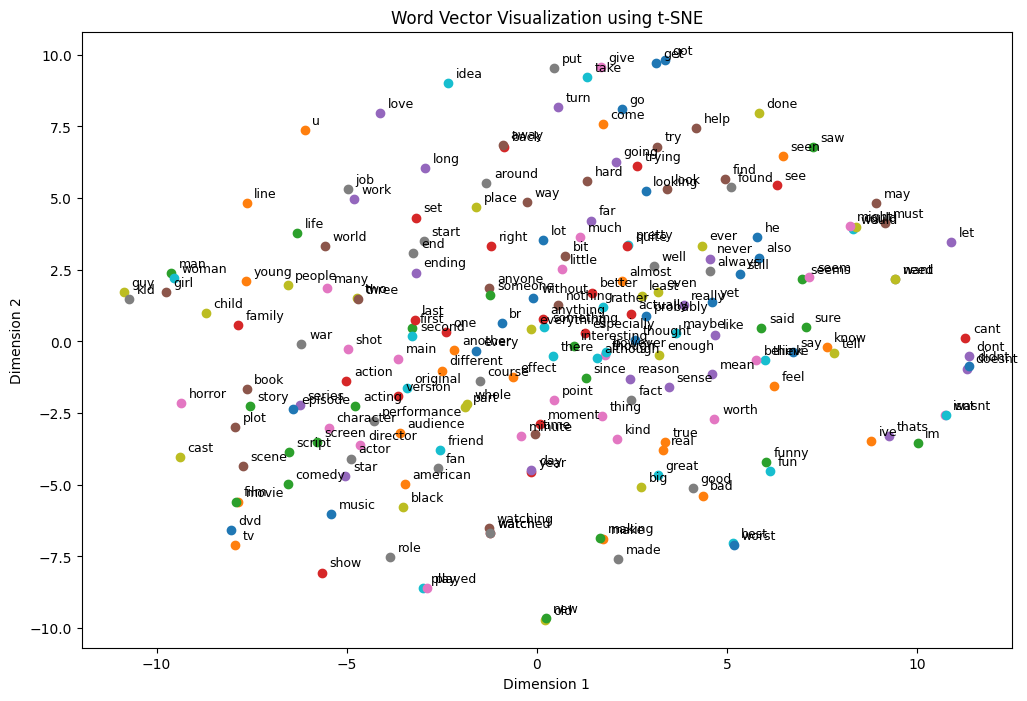

In [16]:
# Visualize word vectors to understand how they work.
# Start by choosing a manageable number of words from the vocabulary, ideally 100–500.
# Focus on words that are frequent in the dataset or relevant to the task,
# Such as sentiment-rich terms like "good," "bad," "amazing," or "terrible."
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random
from collections import Counter


all_tokens = [token for tokens in df["Processed_Tokens"] for token in tokens]
word_freq = Counter(all_tokens)

# Get the top N most frequent words
top_frequent_words = [word for word, _ in word_freq.most_common(200)]

# Extract Word Vectors for Frequent Words
word_vectors = []
visualized_words = []
for word in top_frequent_words:
    if word in fasttext_vectors:  # Ensure the word is in FastText
        word_vectors.append(fasttext_vectors[word])
        visualized_words.append(word)  # St


# Convert word_vectors to a NumPy array
word_vectors = np.array(word_vectors)

# Reduce Dimensionality
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_vectors = tsne.fit_transform(word_vectors)

#  Visualize Word Vectors
plt.figure(figsize=(12, 8))
for i, word in enumerate(visualized_words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.2, reduced_vectors[i, 1] + 0.2, word, fontsize=9)

plt.title("Word Vector Visualization using t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()



In [17]:
# For the selected words, retrieve their corresponding vector representations from the the pre-trained Word2Vec model.
# Each word will have a dense vector of a fixed dimensionality (e.g., 300 for fasttext-wiki-news-subwords-300).

# Get the top 200 most frequent words
selected_words = [word for word, freq in word_freq.most_common(200)]  # Adjust '200' as needed

print(f"Selected the {len(selected_words)} most frequent words.")
print("Sample selected words:", selected_words[:10])

# Retrieve Word Vectors for Selected Words
word_vectors = {}
for word in selected_words:
    if word in fasttext_vectors:
        word_vectors[word] = fasttext_vectors[word]
    else:
        print(f"Word '{word}' not found in FastText vocabulary.")

#  Display Retrieved Vectors
print(f"\nNumber of words with valid vectors: {len(word_vectors)}")
print("Sample word vectors:")
for word, vector in list(word_vectors.items())[:5]:
    print(f"{word}: {vector[:5]}... (truncated)")

Selected the 200 most frequent words.
Sample selected words: ['br', 'movie', 'film', 'one', 'like', 'time', 'character', 'good', 'even', 'would']

Number of words with valid vectors: 200
Sample word vectors:
br: [ 0.12351   -0.0034064  0.21908   -0.060205   0.068236 ]... (truncated)
movie: [-0.063386 -0.074039 -0.01791   0.11879   0.020304]... (truncated)
film: [-0.063582 -0.083513 -0.0106    0.12981   0.055649]... (truncated)
one: [ 0.019569   0.0051348  0.024567  -0.0037714 -0.052806 ]... (truncated)
like: [ 0.0095372  0.01431    0.066626   0.02011   -0.020531 ]... (truncated)


In [18]:
# Use Principal Component Analysis (PCA) to reduce the dimensionality of the word vectors from their original size (e.g., 300) to 2D or 3D.
# PCA simplifies the high-dimensional data while preserving as much variance as possible, making it easier to visualize

from sklearn.decomposition import PCA

#  Prepare Data for PCA
vectors = list(word_vectors.values())
words = list(word_vectors.keys())

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)



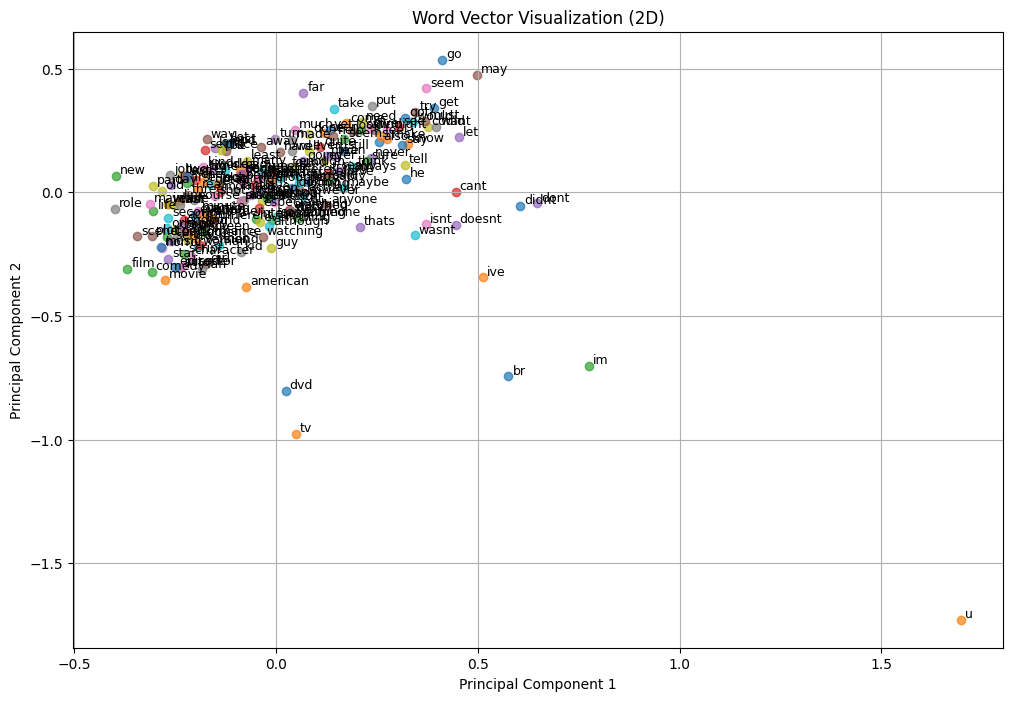

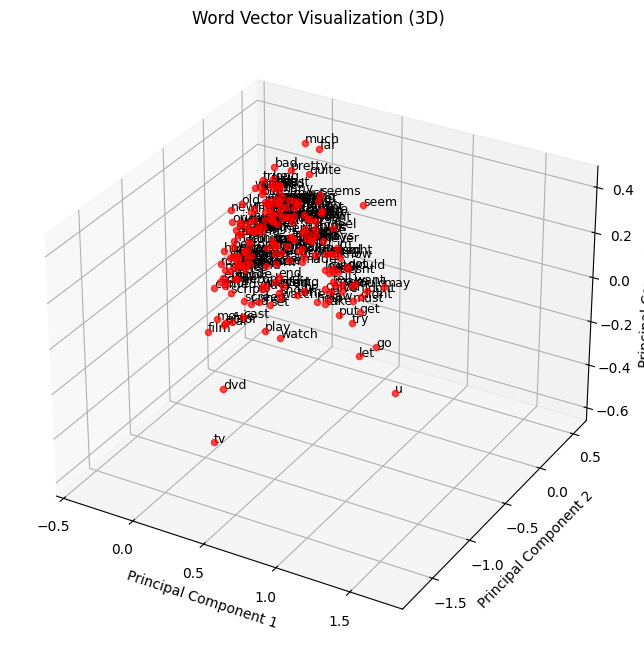

In [19]:
# For 2D visualization, create a scatter plot and annotate each point with its corresponding word to provide context.
# For 3D visualization, use interactive plotting tools like matplotlib’s Axes3D to explore the spatial relationships between words dynamically.
from mpl_toolkits.mplot3d import Axes3D

# 2D Visualization
plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], alpha=0.7)
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word, fontsize=9)

plt.title("Word Vector Visualization (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

print("\n")

pca_3d = PCA(n_components=3)
reduced_vectors_3d = pca_3d.fit_transform(vectors)

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    ax.scatter(reduced_vectors_3d[i, 0], reduced_vectors_3d[i, 1], reduced_vectors_3d[i, 2], color='red', alpha=0.7)
    ax.text(reduced_vectors_3d[i, 0], reduced_vectors_3d[i, 1], reduced_vectors_3d[i, 2], word, fontsize=9)

ax.set_title("Word Vector Visualization (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

  The visualization shows a 2D projection of word vectors, which represent words as points in space based on their semantic meaning. When we look at the plot, we can observe clusters of words that are related in meaning. For example, words like "movie" and "film" are positioned close to each other, indicating that they have similar meanings. Similarly, words like "dvd" and "tv" are grouped together, which suggests that they are often used in similar contexts, such as discussions about media. On the other hand, words like "br," "im," and "u" appear far from others, which could be because they are more common abbreviations or slang terms that don't fit neatly into the same categories as the other words.

The way word vectors capture relationships between words is based on their usage in similar contexts. Words that frequently appear together in sentences tend to have similar vector representations. For instance, "movie" and "film" are often used in similar contexts, which is reflected in their proximity in the visualization. Additionally, word vectors can capture more complex relationships, such as analogies—words that have similar roles in language, like "king" and "queen," or "man" and "woman."

In summary, this visualization helps to show how word vectors can identify semantic relationships, such as synonyms or words that share similar contexts, and also highlights how some words might not fit into these patterns, either because they are less specific or more context-dependent.

In [20]:
# Examine the resulting visualization for patterns.
# Look for clusters of similar words, such as synonyms or words with similar sentiment,
# Observe the distances between opposite terms.
# Demonstrate how word vectors capture semantic relationships.
from scipy.spatial.distance import cosine

# Compare pairs of words
word_pairs = [("good", "great"), ("good", "bad"), ("movie", "film")]

for word1, word2 in word_pairs:
    if word1 in word_vectors and word2 in word_vectors:
        similarity = 1 - cosine(word_vectors[word1], word_vectors[word2])
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.3f}")
    else:
        print(f"One or both words not in vocabulary: {word1}, {word2}")


Similarity between 'good' and 'great': 0.764
Similarity between 'good' and 'bad': 0.850
Similarity between 'movie' and 'film': 0.877


### 4. Creating the Emebdding Matrix (10 points)

In [21]:
def create_embedding_matrix(word2vec, vocab, embedding_dim):

     # Ensure indices are sequential and zero-based
    word_to_index = {word: i for i, word in enumerate(vocab.keys())}
    vocab_size = len(word_to_index)
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    # Fill the embedding matrix
    for word, idx in word_to_index.items():
        if word in word2vec:
            embedding_matrix[idx] = word2vec[word]
        else:
            embedding_matrix[idx] = np.random.normal(size=(embedding_dim,))


    return embedding_matrix

# Create a matrix where each row corresponds to the vector representation of a word in the vocabulary
# The embedding matrix will have dimensions [vocab_size, embedding_dim], where embedding_dim is the size of the word vectors


embedding_dim = 300  # FastText vector size
embedding_matrix = create_embedding_matrix(fasttext_vectors, vocab, embedding_dim)

print(f"Embedding Matrix Shape: {embedding_matrix.shape}")

Embedding Matrix Shape: (66632, 300)


In [22]:
# Convert the embedding matrix to a PyTorch tensor
# You can create the embedding layer in here or directly in the model
# Using PyTorch’s nn.Embedding.from_pretrained method you load the pre-trained embedding matrix into the embedding layer
import torch
import torch.nn as nn

# Convert the embedding matrix to a PyTorch tensor
embedding_tensor = torch.tensor(embedding_matrix, dtype=torch.float)

# Create the embedding layer using nn.Embedding.from_pretrained
embedding_layer = nn.Embedding.from_pretrained(embedding_tensor, freeze=True)  # freeze=True to keep weights fixed

print(f"Embedding Tensor Shape: {embedding_tensor.shape}")
print("Embedding layer created successfully!")


Embedding Tensor Shape: torch.Size([66632, 300])
Embedding layer created successfully!


Deciding whether to freeze or fine-tune the embedding weights depends on the dataset and the specific task. When we freeze the weights (freeze=True), the pre-trained embeddings remain unchanged during training. This approach is useful when the pre-trained embeddings (e.g., Word2Vec or GloVe) are trained on a large and similar corpus to our task. Freezing the embeddings prevents overfitting, especially when the dataset is small, and reduces the computational cost since fewer parameters are updated. It also ensures that the semantic knowledge encoded in the pre-trained embeddings is preserved.

On the other hand, fine-tuning the weights (freeze=False) allows the embeddings to be updated during training. This is beneficial if the task is domain-specific, like legal or medical text, where pre-trained embeddings might not capture domain-specific vocabulary or nuances. Fine-tuning adjusts the embeddings to better suit the dataset but increases the risk of overfitting and computational cost.

For the IMDB Movie Reviews Dataset used in sentiment analysis, freezing the weights is a practical choice. The pre-trained embeddings already capture general semantic relationships, which are sufficient for this task. Additionally, it helps avoid overfitting and keeps training efficient. However, if the performance with frozen embeddings is not satisfactory, fine-tuning could be tried to allow the embeddings to better adapt to the specific dataset.








### 5. Implementing the IMDBDataset (5 points)
* Use PyTorch’s Dataset and DataLoader classes to manage the dataset efficiently and create mini-batches for training.

In [23]:
# Train, validation and test split
from sklearn.model_selection import train_test_split

def split_data(padded_sequences, labels, train_ratio=0.7, val_ratio=0.2):

    # split into train and temp
    X_train, X_temp, y_train, y_temp = train_test_split(
        padded_sequences, labels, test_size=(1 - train_ratio), random_state=42
    )
    # split temp into validation and test
    val_ratio_adjusted = val_ratio / (1 - train_ratio)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=(1 - val_ratio_adjusted), random_state=42
    )
    return X_train, X_val, X_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = split_data(
    df["Padded_Indices"].tolist(), df["sentiment"].tolist()
)

# Convert string labels to integers
label_mapping = {"positive": 1, "negative": 0}  # Adjust as needed
y_train = np.array([label_mapping[label] for label in y_train])
y_val = np.array([label_mapping[label] for label in y_val])
y_test = np.array([label_mapping[label] for label in y_test])
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

# Verify the conversion
print(f"y_train after conversion: {y_train[:5]}")



(6999,)
(2000,)
(1001,)
y_train after conversion: [1 0 0 0 1]


In [24]:
# Implement the dataset class
# Combine the padded sequences and corresponding sentiment labels into a dataset structure compatible with PyTorch.
import torch
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, sequences, labels):
        # Convert inputs to PyTorch tensors
        self.sequences = torch.tensor(np.array(sequences), dtype=torch.long)
        self.labels = torch.tensor(np.array(labels), dtype=torch.long)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

In [25]:
# Create the train, validation and test dataLoaders

from torch.utils.data import DataLoader
import numpy as np



# Function to create DataLoader
def create_dataloader(sequences, labels, batch_size, shuffle=True):
    dataset = SentimentDataset(sequences, labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Clamp function to ensure valid indices
def clamp_sequences(sequences, vocab_size):
    return [[min(idx, vocab_size - 1) for idx in seq] for seq in sequences]

# Clamp the sequences to the vocabulary size
vocab_size = embedding_tensor.shape[0]
X_train = clamp_sequences(X_train, vocab_size)
X_val = clamp_sequences(X_val, vocab_size)
X_test = clamp_sequences(X_test, vocab_size)
# Create DataLoaders
batch_size = 32
train_loader = create_dataloader(X_train, y_train, batch_size)
val_loader = create_dataloader(X_val, y_val, batch_size, shuffle=False)
test_loader = create_dataloader(X_test, y_test, batch_size, shuffle=False)

for batch_sequences, batch_labels in train_loader:
    print(f"Batch Sequences Shape: {batch_sequences.shape}")
    print(f"Batch Labels Shape: {batch_labels.shape}")
    break

Batch Sequences Shape: torch.Size([32, 237])
Batch Labels Shape: torch.Size([32])


### 6. Implementing and Optimizing the Custom LSTM model (40 points)

In [26]:
# Manually implement the LSTM cell to understand its architecture and functionality.
# Implement forget, input, and output gates.
# Update the cell state and compute the hidden state for each time step.
# Explain your steps and usage of the gates
# Check assignment pdf for more detail on implementation tips

# (below is just an empty example, you can change it entirely to make it suitable with your implementation)

import torch
import torch.nn as nn

class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):

        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Forget gate
        self.W_f = nn.Linear(input_size + hidden_size, hidden_size)

        # Input gate
        self.W_i = nn.Linear(input_size + hidden_size, hidden_size)
        self.W_c = nn.Linear(input_size + hidden_size, hidden_size)

        # Output gate
        self.W_o = nn.Linear(input_size + hidden_size, hidden_size)

    def forward(self, x_t, h_prev, c_prev):


        combined = torch.cat((x_t, h_prev), dim=1)

        # Forget gate
        f_t = torch.sigmoid(self.W_f(combined))

        # Input gate
        i_t = torch.sigmoid(self.W_i(combined))
        c_tilde_t = torch.tanh(self.W_c(combined))

        # Update cell state
        c_t = f_t * c_prev + i_t * c_tilde_t

        # Output gate
        o_t = torch.sigmoid(self.W_o(combined))
        h_t = o_t * torch.tanh(c_t)

        return h_t, c_t


In [27]:
# Build an LSTM layer by combining one or multiple LSTM cells to process a sequence.

# (below is just an empty example, you can change it entirely to make it suitable with your implementation)

class LSTMLayer(nn.Module):
    def __init__(self, input_size, hidden_size):

        super(LSTMLayer, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = LSTMCell(input_size, hidden_size)

    def forward(self, x):

        batch_size, seq_len, _ = x.size()

        # Initialize hidden and cell states
        h_t = torch.zeros(batch_size, self.hidden_size).to(x.device)
        c_t = torch.zeros(batch_size, self.hidden_size).to(x.device)

        outputs = []

        # Iterate through the sequence
        for t in range(seq_len):
            x_t = x[:, t, :]
            h_t, c_t = self.lstm_cell(x_t, h_t, c_t)
            outputs.append(h_t)
        outputs = torch.stack(outputs, dim=1)

        return outputs

In [28]:
# Build an LSTM model. Integrate the embedding layer into the model architecture.
# The embedding layer will convert input indices (from padded sequences) into dense word vectors.
# Decide whether to freeze the embedding weights or allow them to be fine-tuned during training and explain your choice.
# These dense vectors are then passed to the LSTM layer for sequential processing.
# You can provide embedding_matrix as tensor to define embedding layer inside the model class
# Or if you have defined embedding layer before, you can directly use that inside the model class

# (below is just an empty example, you can change it entirely to make it suitable with your implementation)
import torch
import torch.nn as nn


class SentimentLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, embedding_matrix, freeze_embedding=True):
        super(SentimentLSTM, self).__init__()
        # Embedding Layer
        vocab_size, embedding_dim = embedding_matrix.shape
        self.embedding = nn.Embedding.from_pretrained(
            embeddings=embedding_matrix, freeze=freeze_embedding
        )

        # Custom LSTM Layer
        self.lstm_layer = LSTMLayer(input_size=embedding_dim, hidden_size=hidden_size)

        # Dense Output Layer
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()  # For binary classification

    def forward(self, x):
        embedded = self.embedding(x)

        # Pass embeddings through theLSTM layer
        lstm_out = self.lstm_layer(embedded)

        last_hidden_state = lstm_out[:, -1, :]

        # Pass the last hidden state through the dense output layer
        logits = self.fc(last_hidden_state)

        # Apply sigmoid activation to get the probabilities
        output = self.sigmoid(logits)

        return output


The implementation of the LSTM cell follows the architecture designed to process sequential data effectively, with specific gates controlling the flow of information. The LSTM cell includes three main gates—forget, input, and output—that work together to maintain and update the cell state and compute the hidden state.

Forget Gate:
The forget gate decides which parts of the previous cell state should be retained or discarded. It takes the concatenated input vector and the previous hidden state and applies a sigmoid activation function. The sigmoid outputs values between 0 and 1, where 0 indicates forgetting the information, and 1 indicates retaining it. This step ensures that only relevant information from the past is carried forward.

Input Gate:
The input gate determines which new information from the current input should be added to the cell state. It uses two components: a sigmoid activation function to control the importance of the input and a tanh function to compute the candidate cell state, which represents new information to be added. These components are then multiplied, ensuring only the necessary parts of the new input are added to the cell state.

Cell State Update:
The cell state is updated by combining the forget gate's output and the input gate's contribution. Specifically, the forget gate removes irrelevant parts of the previous cell state, while the input gate adds new information. This updated cell state forms the memory that is passed to the next time step.

Output Gate:
The output gate determines the hidden state, which is the output of the current LSTM cell. It uses the updated cell state and a sigmoid-activated version of the concatenated input and hidden state. The hidden state is calculated by applying a tanh function to the updated cell state and then modulating it with the output gate's activation. The hidden state serves as both the output of the current cell and an input to the next cell in the sequence.

Custom LSTM Layer:
The custom LSTM layer combines multiple LSTM cells to process a sequence of inputs. For each time step, the LSTM cell updates the hidden and cell states using the input and previous states. The outputs for each time step are stored, forming a tensor representing the sequence's hidden states.

Embedding Layer Integration:
The embedding layer converts input word indices into dense vectors (word embeddings) that serve as inputs to the LSTM layer. This layer can be initialized with pre-trained embeddings, which can either be frozen or fine-tuned. Freezing the embeddings preserves pre-trained semantic knowledge, while fine-tuning allows adaptation to the specific dataset.

Final Output:
The output of the LSTM layer's last hidden state is passed through a fully connected layer for classification. A sigmoid activation function is applied to produce probabilities for binary sentiment analysis.

By designing the LSTM cell manually, we gain a deeper understanding of how each gate contributes to the flow of information, allowing the model to handle long-term dependencies and effectively learn from sequential data.

In [37]:
# Define the hyperparameters and try to optimize your model by experimenting with these
# Hyperparameters
input_size = 300  # Embedding dimension (from pre-trained embeddings)
hidden_size = 128  # Size of LSTM hidden state
epochs = 50  # Number of training epochs
learning_rate = 0.001  # Learning rate for the Adam optimizer
batch_size = 32  # Batch size for DataLoader

In [40]:
# Define appropriate loss function for binary classification.
# Choose an optimizer and set its parameters (e.g., learning rate).
# Explain your choice of loss function and optimization algorithm.
import torch.optim as optim

# Define the model
output_size = 1

model = SentimentLSTM(
    input_size=input_size,
    hidden_size=hidden_size,
    output_size=output_size,
    embedding_matrix=embedding_tensor,
    freeze_embedding=False  # Allow fine-tuning of embeddings
)
model = model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = criterion = nn.BCEWithLogitsLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)


For this binary classification task, I selected the Binary Cross-Entropy Loss (BCELoss) as the loss function because it is specifically designed for binary classification problems. It measures the difference between the predicted probability (output of the sigmoid function) and the actual target labels (0 or 1). BCELoss works well with probabilities, ensuring that the model penalizes incorrect predictions more heavily, which helps the model learn to distinguish between classes effectively.

The Adam optimizer was chosen because it combines the advantages of both momentum and adaptive learning rates, making it highly efficient and well-suited for deep learning tasks. Adam adjusts the learning rate dynamically for each parameter based on the gradients, which helps the model converge faster and handle sparse gradients effectively. The learning rate scheduler (ReduceLROnPlateau) further enhances training by reducing the learning rate when the loss plateaus, enabling the model to fine-tune its weights during later stages of training. This combination ensures robust and efficient learning, adapting to both initial fast learning and later fine-tuning phases.

# Explain your choice of loss function and optimization algorithm.


In [41]:
# Implement the training loop
# Iterate over the training dataset in mini-batches.
# Implement forward pass, feed the inputs through the network to compute the predictions.
# Validate the model on the validation set periodically to monitor performance

from sklearn.metrics import accuracy_score, f1_score
import torch

# Training function
def train_model(
    model, train_loader, val_loader, optimizer, scheduler, criterion, epochs, device
):
    model.to(device)

    # Track metrics
    history = {"train_loss": [], "val_loss": [], "val_accuracy": [], "val_f1": []}
    best_val_loss = float("inf")

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        all_train_preds = []
        all_train_labels = []

        # Training loop
        for batch_sequences, batch_labels in train_loader:
            batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device).float()

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_sequences)
            loss = criterion(outputs.squeeze(), batch_labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            preds = (outputs.squeeze() > 0.5).int()
            all_train_preds.extend(preds.cpu().numpy())
            all_train_labels.extend(batch_labels.cpu().numpy())

        # Calculate training loss and accuracy
        train_loss = running_loss / len(train_loader)
        train_accuracy = accuracy_score(all_train_labels, all_train_preds)

        # Validation loop
        model.eval()
        val_loss = 0.0
        all_val_preds = []
        all_val_labels = []

        with torch.no_grad():
            for batch_sequences, batch_labels in val_loader:
                batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device).float()
                outputs = model(batch_sequences)

                #  validation loss
                loss = criterion(outputs.squeeze(), batch_labels)
                val_loss += loss.item()

                # Collect predictions and labels for validation metrics
                preds = (outputs.squeeze() > 0.5).int()
                all_val_preds.extend(preds.cpu().numpy())
                all_val_labels.extend(batch_labels.cpu().numpy())

        val_loss /= len(val_loader)
        val_accuracy = accuracy_score(all_val_labels, all_val_preds)
        val_f1 = f1_score(all_val_labels, all_val_preds)

        scheduler.step(val_loss)

        # Log metrics
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["val_accuracy"].append(val_accuracy)
        history["val_f1"].append(val_f1)

        # Print metrics
        print(
            f"Epoch {epoch + 1}/{epochs}, "
            f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
            f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val F1 Score: {val_f1:.4f}"
        )

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pt")

    return history

# Load the best model after training
def load_best_model(model, path="best_model.pt"):
    model.load_state_dict(torch.load(path))
    return model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train the model
history = train_model(
    model, train_loader, val_loader, optimizer, scheduler, criterion, epochs, device
)


Epoch 1/50, Train Loss: 0.6949, Train Accuracy: 0.5056, Val Loss: 0.6931, Val Accuracy: 0.4820, Val F1 Score: 0.0000
Epoch 2/50, Train Loss: 0.6928, Train Accuracy: 0.5068, Val Loss: 0.6910, Val Accuracy: 0.4885, Val F1 Score: 0.0340
Epoch 3/50, Train Loss: 0.6830, Train Accuracy: 0.5372, Val Loss: 0.6888, Val Accuracy: 0.5025, Val F1 Score: 0.1124
Epoch 4/50, Train Loss: 0.7703, Train Accuracy: 0.5276, Val Loss: 0.7796, Val Accuracy: 0.5390, Val F1 Score: 0.6875
Epoch 5/50, Train Loss: 0.8035, Train Accuracy: 0.5142, Val Loss: 0.7755, Val Accuracy: 0.5445, Val F1 Score: 0.6888
Epoch 6/50, Train Loss: 0.8009, Train Accuracy: 0.5178, Val Loss: 0.7719, Val Accuracy: 0.5480, Val F1 Score: 0.6878
Epoch 7/50, Train Loss: 0.6968, Train Accuracy: 0.5502, Val Loss: 0.6897, Val Accuracy: 0.5010, Val F1 Score: 0.1121
Epoch 8/50, Train Loss: 0.6746, Train Accuracy: 0.5549, Val Loss: 0.6904, Val Accuracy: 0.5015, Val F1 Score: 0.1293
Epoch 9/50, Train Loss: 0.6746, Train Accuracy: 0.5554, Val Loss

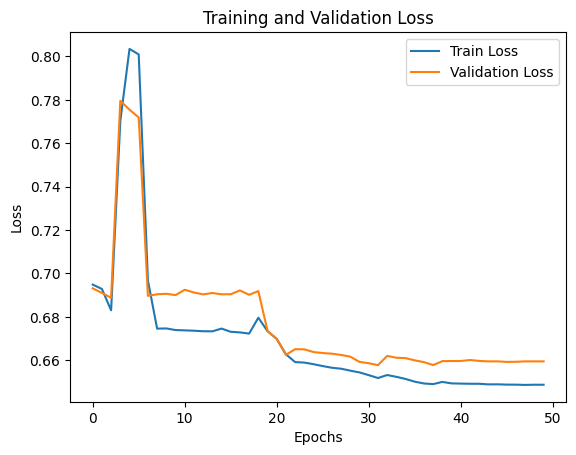

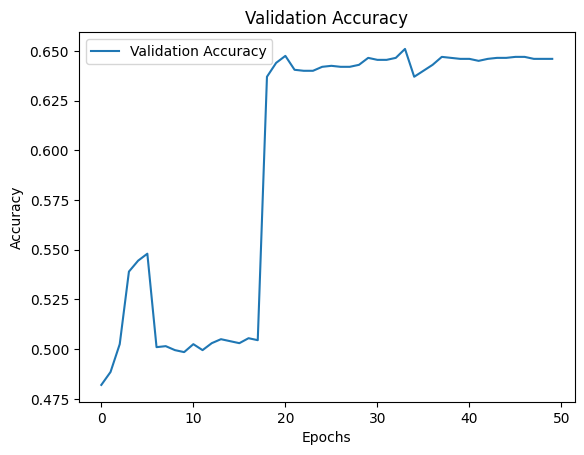

In [42]:
# Visualize the accuracy and loss change of the best model across training and validation datasets
# Make comments on the results

# Plot accuracy and loss
# Plot or analyze the training history
import matplotlib.pyplot as plt

plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

plt.plot(history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Accuracy")
plt.show()


### 7. Testing and Analysis (15 points)

In [43]:
# Test the best model on the test set to evaluate its performance.
# Compute metrics such as accuracy, precision, recall, and F1-score to assess classification performance.
# Explain and analyze your findings and results.
# Summarize the performance of the model on the training, validation and test set. Comment on the results.
# Discuss any challenges encountered during training and potential areas for improvement.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate the model
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch_sequences, batch_labels in test_loader:
            batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device).float()

            # Forward pass
            outputs = model(batch_sequences)
            loss = criterion(outputs.squeeze(), batch_labels)
            test_loss += loss.item()

            # Collect predictions and labels
            preds = (outputs.squeeze() > 0.5).int()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch_labels.cpu().numpy())


    test_loss /= len(test_loader)

    test_accuracy = accuracy_score(all_labels, all_preds)
    test_precision = precision_score(all_labels, all_preds)
    test_recall = recall_score(all_labels, all_preds)
    test_f1 = f1_score(all_labels, all_preds)

    return {
        "loss": test_loss,
        "accuracy": test_accuracy,
        "precision": test_precision,
        "recall": test_recall,
        "f1_score": test_f1,
    }

test_metrics = evaluate_model(model, test_loader, criterion, device)

print("Test Set Performance:")
for metric, value in test_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")



Test Set Performance:
Loss: 0.6721
Accuracy: 0.6364
Precision: 0.6659
Recall: 0.5575
F1_score: 0.6069


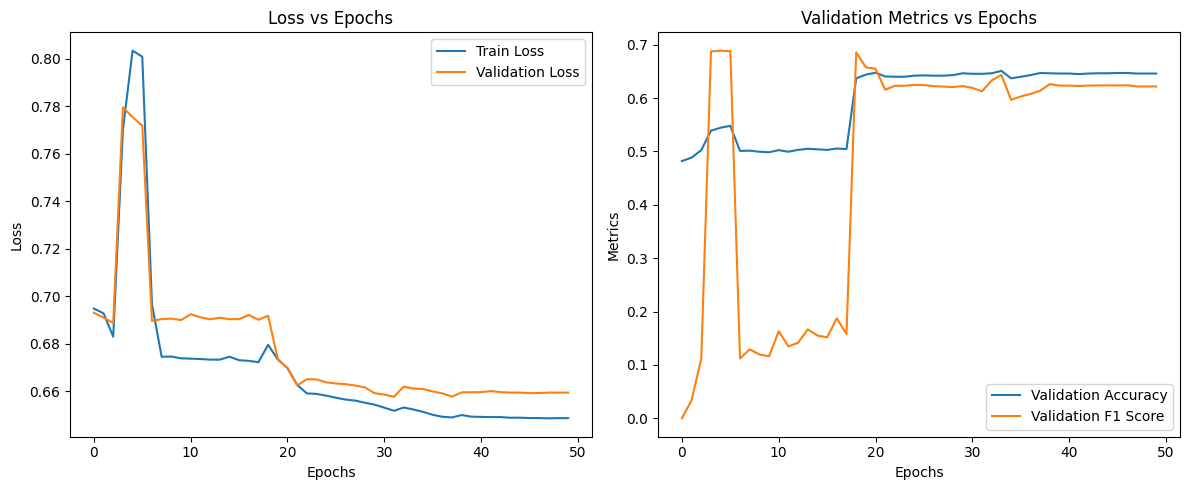

In [44]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs")

# Plot validation accuracy and F1-score
plt.subplot(1, 2, 2)
plt.plot(history["val_accuracy"], label="Validation Accuracy")
plt.plot(history["val_f1"], label="Validation F1 Score")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend()
plt.title("Validation Metrics vs Epochs")

plt.tight_layout()
plt.show()


The training and validation metrics show a mixed pattern of performance improvement and instability. The training loss decreases steadily, indicating that the model is effectively learning from the training data. The validation loss, however, shows significant fluctuations, especially during the initial epochs, which may suggest instability in model generalization. These fluctuations could be caused by high learning rates or potential issues with data preprocessing or imbalanced classes. The validation accuracy stabilizes after an initial phase of fluctuations, indicating that the model is achieving consistent predictions. However, the validation F1 score exhibits sharp spikes and drops, suggesting potential challenges in balancing precision and recall, possibly due to class imbalance or noise in the validation set. Despite these issues, the overall trend in the metrics suggests that the model is learning and has the potential to generalize well, but further tuning and regularization might be required to improve stability and performance consistency.

#### Comparison with the Pytorch LSTM model (Optional)

In [46]:


import torch
import torch.nn as nn

class PyTorchLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_size, output_size, embedding_matrix, freeze_embedding=True):
        super(PyTorchLSTM, self).__init__()

        vocab_size, embedding_dim = embedding_matrix.shape
        self.embedding = nn.Embedding.from_pretrained(
            torch.tensor(embedding_matrix, dtype=torch.float),
            freeze=freeze_embedding
        )

        # PyTorch's built-in LSTM layer
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_size,
            batch_first=True
        )

        # Fully connected layer for binary classification
        self.fc = nn.Linear(hidden_size, output_size)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)

        lstm_out, (h_n, c_n) = self.lstm(embedded)

        # Use the last hidden state
        last_hidden_state = h_n[-1]

        # Pass through the fully connected layer
        logits = self.fc(last_hidden_state)

        output = self.sigmoid(logits)

        return output



In [45]:
# Implement the training loop
# Iterate over the training dataset in mini-batches.
# Implement forward pass, feed the inputs through the network to compute the predictions.
# Validate the model on the validation set periodically to monitor performance
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, optimizer, criterion, scheduler, epochs, device):
    model.to(device)

    history = {"train_loss": [], "val_loss": [], "val_accuracy": [], "val_f1": []}
    best_val_loss = float("inf")
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        all_train_preds = []
        all_train_labels = []

        # Training loop
        for batch_sequences, batch_labels in train_loader:
            batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device).float()


            optimizer.zero_grad()

            outputs = model(batch_sequences)
            loss = criterion(outputs.squeeze(), batch_labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            preds = (outputs.squeeze() > 0.5).int()
            all_train_preds.extend(preds.cpu().numpy())
            all_train_labels.extend(batch_labels.cpu().numpy())

        # Training metrics
        train_loss = running_loss / len(train_loader)
        train_accuracy = accuracy_score(all_train_labels, all_train_preds)

        # Validation loop
        model.eval()
        val_loss = 0.0
        all_val_preds = []
        all_val_labels = []

        with torch.no_grad():
            for batch_sequences, batch_labels in val_loader:
                batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device).float()

                outputs = model(batch_sequences)
                loss = criterion(outputs.squeeze(), batch_labels)
                val_loss += loss.item()

                preds = (outputs.squeeze() > 0.5).int()
                all_val_preds.extend(preds.cpu().numpy())
                all_val_labels.extend(batch_labels.cpu().numpy())

        # Validation metrics
        val_loss /= len(val_loader)
        val_accuracy = accuracy_score(all_val_labels, all_val_preds)
        val_f1 = f1_score(all_val_labels, all_val_preds)

        # Adjust learning rate
        scheduler.step(val_loss)

        # Log metrics
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["val_accuracy"].append(val_accuracy)
        history["val_f1"].append(val_f1)

        print(
            f"Epoch {epoch + 1}/{epochs}, "
            f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
            f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val F1 Score: {val_f1:.4f}"
        )

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()

    model.load_state_dict(best_model_state)
    return history


In [50]:
# Define parameters
# Define criterion and optimizer
# Train PyTorch LSTM model
# Define parameters
epochs = 50
learning_rate = 0.001
batch_size = 32
hidden_size = 128
output_size = 1
embedding_dim = 300

import torch.optim as optim

# criterion and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", patience=3, verbose=True)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50, Train Loss: 0.6938, Train Accuracy: 0.4942, Val Loss: 0.6951, Val Accuracy: 0.4905, Val F1 Score: 0.0591
Epoch 2/50, Train Loss: 0.6885, Train Accuracy: 0.5191, Val Loss: 0.6957, Val Accuracy: 0.4900, Val F1 Score: 0.0860
Epoch 3/50, Train Loss: 0.6770, Train Accuracy: 0.5288, Val Loss: 0.7015, Val Accuracy: 0.4880, Val F1 Score: 0.0890
Epoch 4/50, Train Loss: 0.6606, Train Accuracy: 0.5328, Val Loss: 0.7085, Val Accuracy: 0.4870, Val F1 Score: 0.1016
Epoch 5/50, Train Loss: 0.6490, Train Accuracy: 0.5479, Val Loss: 0.7276, Val Accuracy: 0.4900, Val F1 Score: 0.1115
Epoch 6/50, Train Loss: 0.6391, Train Accuracy: 0.5445, Val Loss: 0.7332, Val Accuracy: 0.4890, Val F1 Score: 0.1098
Epoch 7/50, Train Loss: 0.6351, Train Accuracy: 0.5476, Val Loss: 0.7523, Val Accuracy: 0.5075, Val F1 Score: 0.6619
Epoch 8/50, Train Loss: 0.6339, Train Accuracy: 0.5549, Val Loss: 0.7417, Val Accuracy: 0.5070, Val F1 Score: 0.6628
Epoch 9/50, Train Loss: 0.6280, Train Accuracy: 0.5518, Val Loss

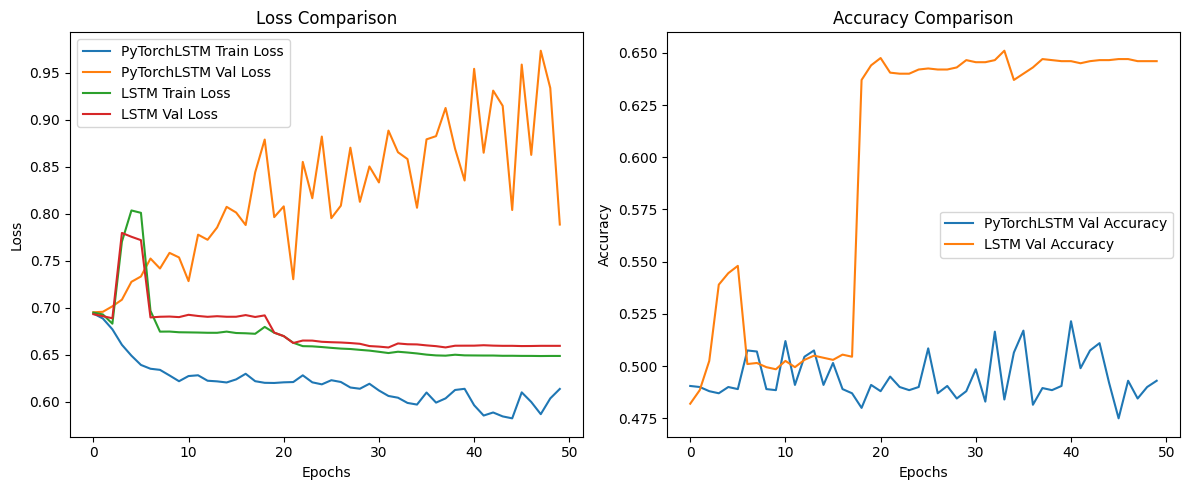

In [51]:
# Compare the performance of your custom LSTM model with PyTorchLSTM model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pytorch_lstm_model = PyTorchLSTM(embedding_dim, hidden_size, output_size, embedding_matrix)
pytorch_lstm_optimizer = optim.Adam(pytorch_lstm_model.parameters(), lr=learning_rate)
history_pytorch_lstm = train_model(
    pytorch_lstm_model, train_loader, val_loader, pytorch_lstm_optimizer, criterion, scheduler, epochs, device
)


# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_pytorch_lstm["train_loss"], label="PyTorchLSTM Train Loss")
plt.plot(history_pytorch_lstm["val_loss"], label="PyTorchLSTM Val Loss")
plt.plot(history["train_loss"], label="LSTM Train Loss")
plt.plot(history["val_loss"], label="LSTM Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Comparison")

plt.subplot(1, 2, 2)
plt.plot(history_pytorch_lstm["val_accuracy"], label="PyTorchLSTM Val Accuracy")
plt.plot(history["val_accuracy"], label="LSTM Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Comparison")

plt.tight_layout()
plt.show()



The comparison between the PyTorchLSTM model and the custom LSTM model reveals distinct patterns in their performance. In terms of training loss, the PyTorchLSTM model shows a steady decrease over epochs, suggesting effective learning from the training data. The custom LSTM model also converges smoothly but appears to stabilize slightly earlier than PyTorchLSTM. However, the validation loss for PyTorchLSTM fluctuates significantly and fails to stabilize, indicating issues with overfitting or instability in generalization. In contrast, the custom LSTM model demonstrates a more consistent validation loss curve, which aligns closely with its training loss, suggesting better generalization.

On the accuracy side, the PyTorchLSTM model struggles with validation accuracy, showing significant fluctuations and failing to achieve consistent improvements. The custom LSTM model, however, outperforms PyTorchLSTM with a much higher and stable validation accuracy across epochs. This suggests that the custom implementation might be more effective at capturing patterns in the data and balancing precision and recall.

Overall, the custom LSTM model demonstrates superior validation performance, with more stable loss and accuracy metrics, indicating better generalization to unseen data. PyTorchLSTM’s instability could be addressed by refining hyperparameters, adjusting regularization techniques, or improving data preprocessing.